<a href="https://colab.research.google.com/github/uygararas/ie423/blob/main/tasks/task10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/electric/data.csv')

# Convert datetime column to datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Display the updated dataframe
df.head()

Mounted at /content/drive


,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [4]:
# Set the datetime column as the index
df.set_index('datetime', inplace=True)

# Display the updated dataframe
df.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


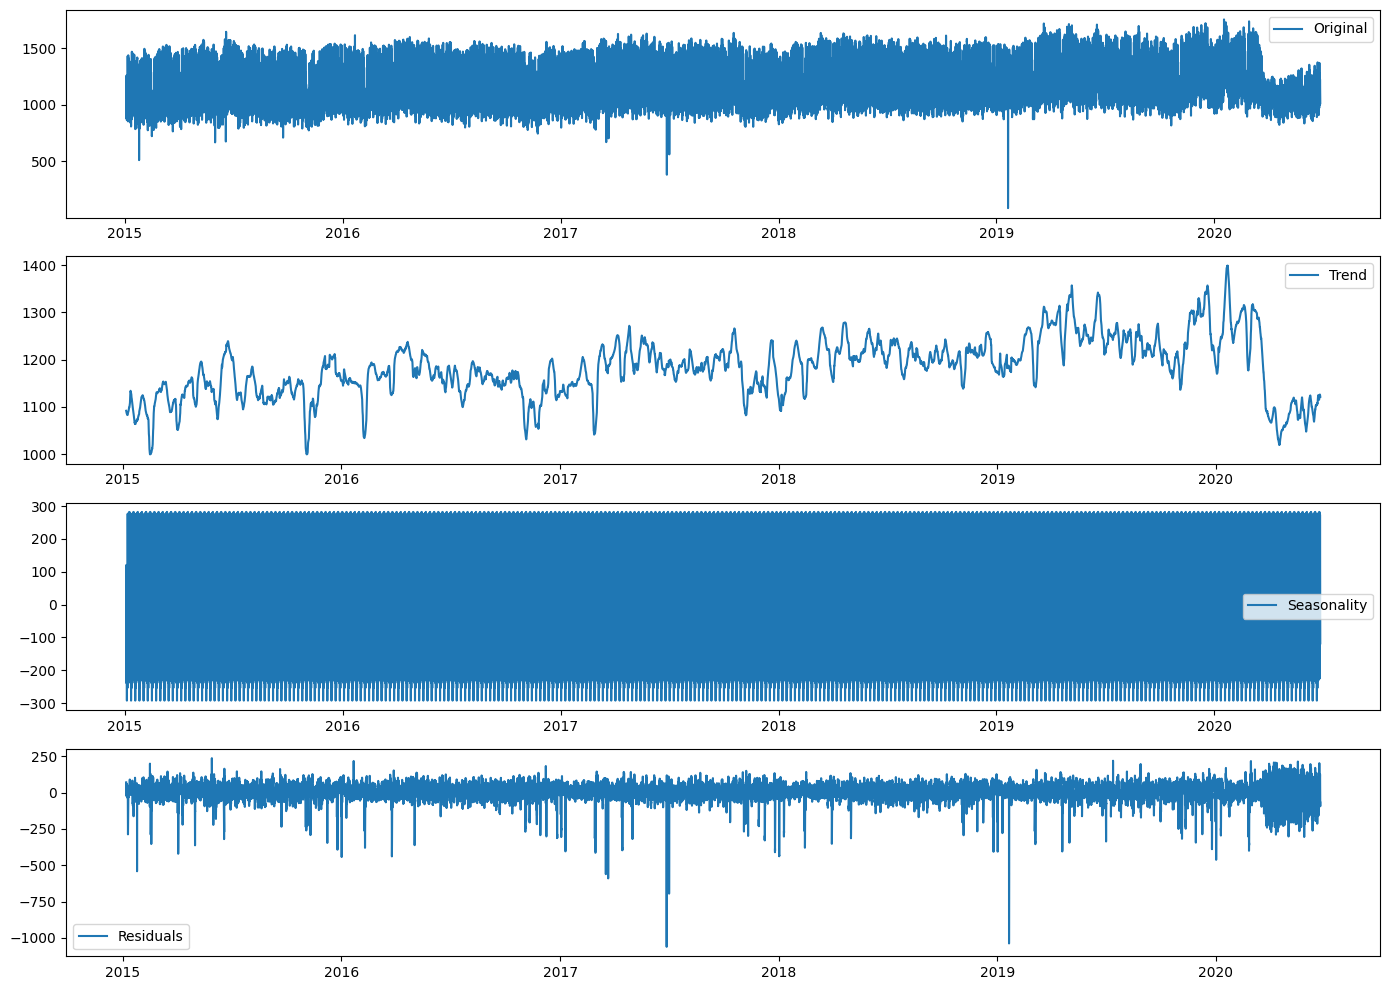

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
# Perform time series decomposition with a weekly period (168 hours)
result_weekly = seasonal_decompose(df['nat_demand'], model='additive', period=168)

# Extract the components
trend_weekly = result_weekly.trend
seasonal_weekly = result_weekly.seasonal
residual_weekly = result_weekly.resid

# Plot the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(df['nat_demand'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend_weekly, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal_weekly, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual_weekly, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [9]:
# Check for missing data
missing_data = df.isnull().sum()

# Display missing data
missing_data

# Optionally, fill or interpolate missing data
df['nat_demand'].interpolate(method='time', inplace=True)

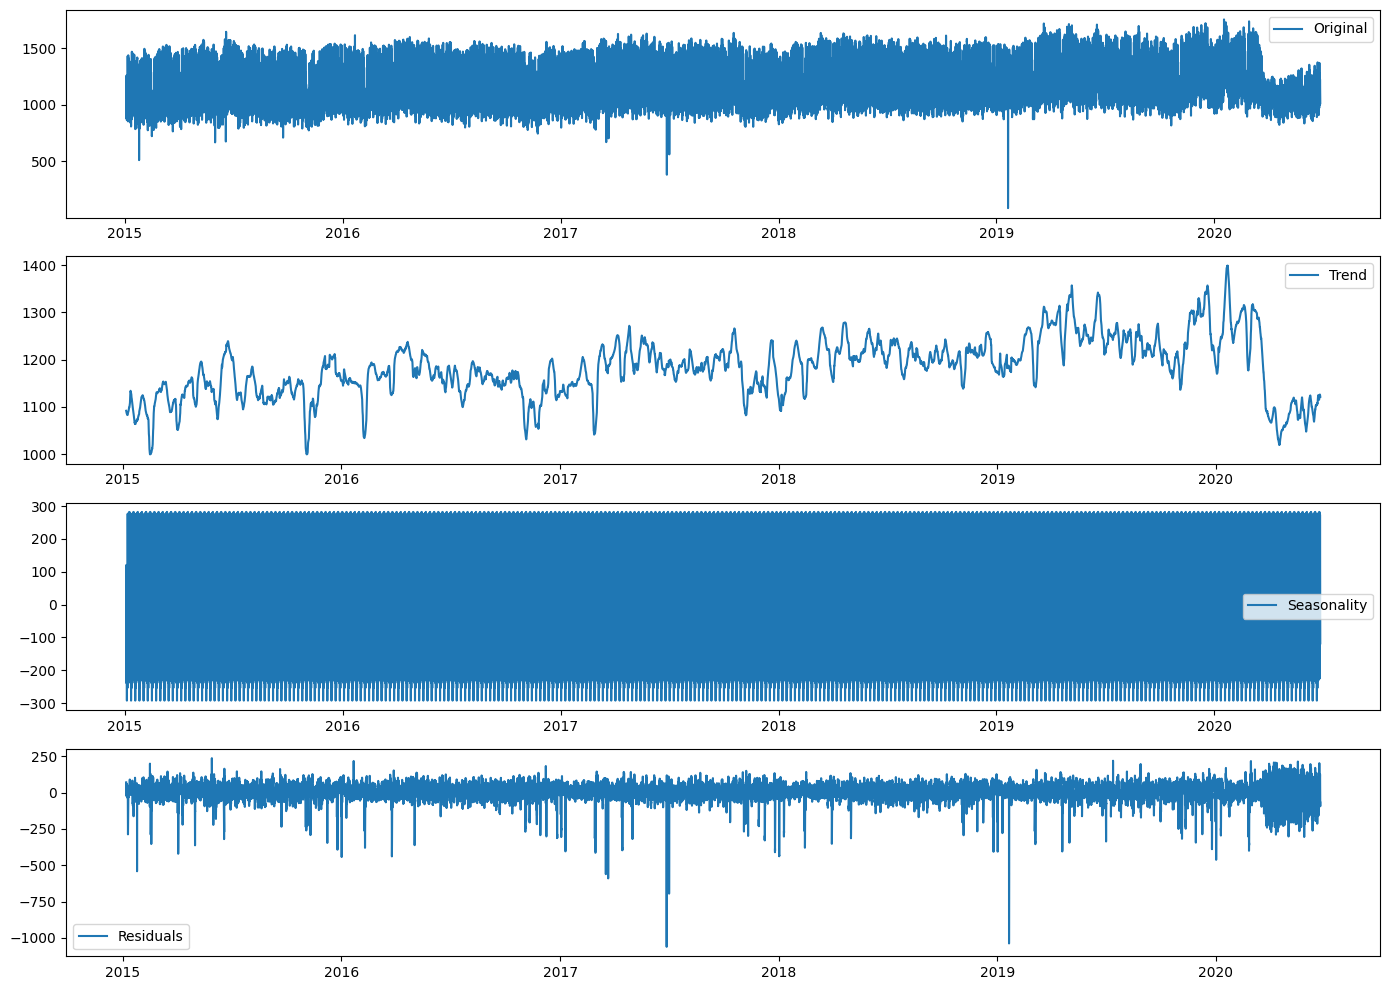

In [10]:
# Perform time series decomposition again with a weekly period (168 hours) after handling missing data
result_weekly = seasonal_decompose(df['nat_demand'], model='additive', period=168)

# Extract the components
trend_weekly = result_weekly.trend
seasonal_weekly = result_weekly.seasonal
residual_weekly = result_weekly.resid

# Plot the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(df['nat_demand'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend_weekly, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal_weekly, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual_weekly, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

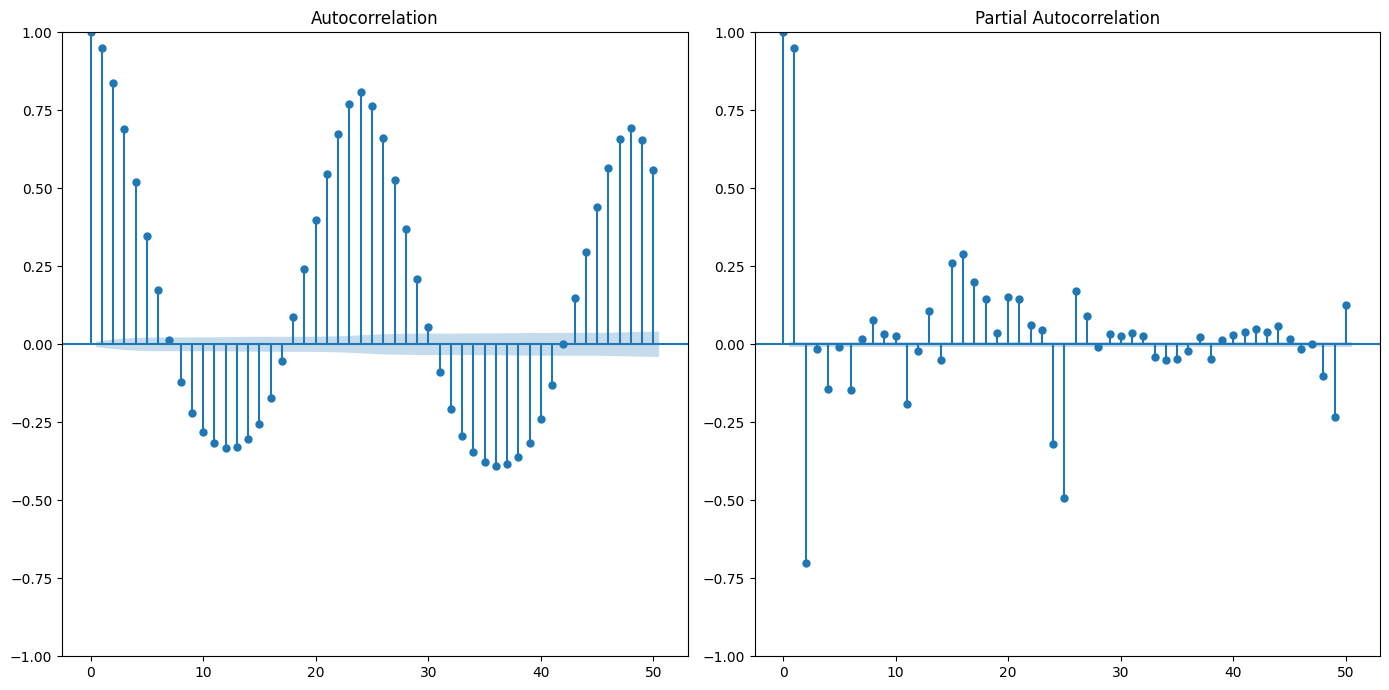

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation and partial autocorrelation
plt.figure(figsize=(14, 7))

plt.subplot(121)
plot_acf(df['nat_demand'].dropna(), lags=50, ax=plt.gca())

plt.subplot(122)
plot_pacf(df['nat_demand'].dropna(), lags=50, ax=plt.gca())

plt.tight_layout()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(df['nat_demand'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))

ADF Statistic: -20.96175000729656
p-value: 0.0
Critical Value (1%): -3.430
Critical Value (5%): -2.862
Critical Value (10%): -2.567


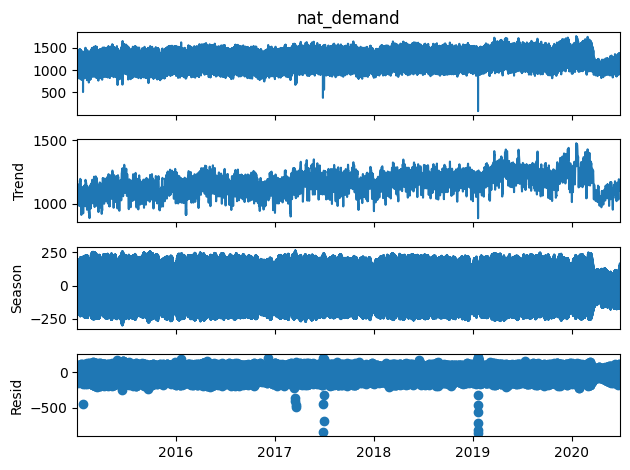

In [13]:
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition
stl = STL(df['nat_demand'], seasonal=13)
result_stl = stl.fit()

# Plot the STL components
result_stl.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:               nat_demand   No. Observations:                48048
Model:             ExponentialSmoothing   SSE                       37941701.198
Optimized:                         True   AIC                         320609.304
Trend:                             None   BIC                         320837.583
Seasonal:                      Additive   AICC                        320609.338
Seasonal Periods:                    24   Date:                 Tue, 06 Aug 2024
Box-Cox:                          False   Time:                         16:04:03
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9714286                alpha                 True
smoothing_seasonal       

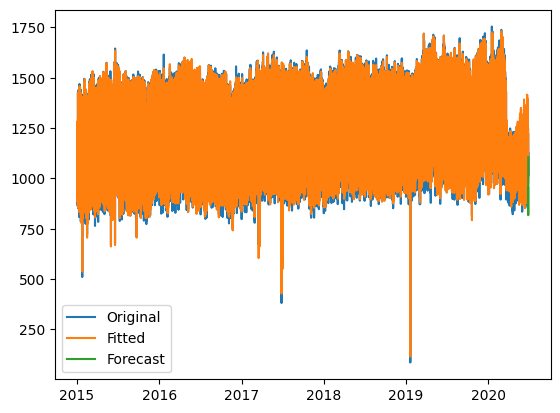

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit ETS model
ets_model = ExponentialSmoothing(df['nat_demand'], seasonal='add', seasonal_periods=24)
ets_fit = ets_model.fit()

# Print summary of the model
print(ets_fit.summary())

# Generate forecasts
forecast = ets_fit.forecast(steps=10) # Replace 10 with the desired number of forecast steps

# Plot the original data, fitted values, and forecast
plt.plot(df['nat_demand'], label='Original')
plt.plot(ets_fit.fittedvalues, label='Fitted')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

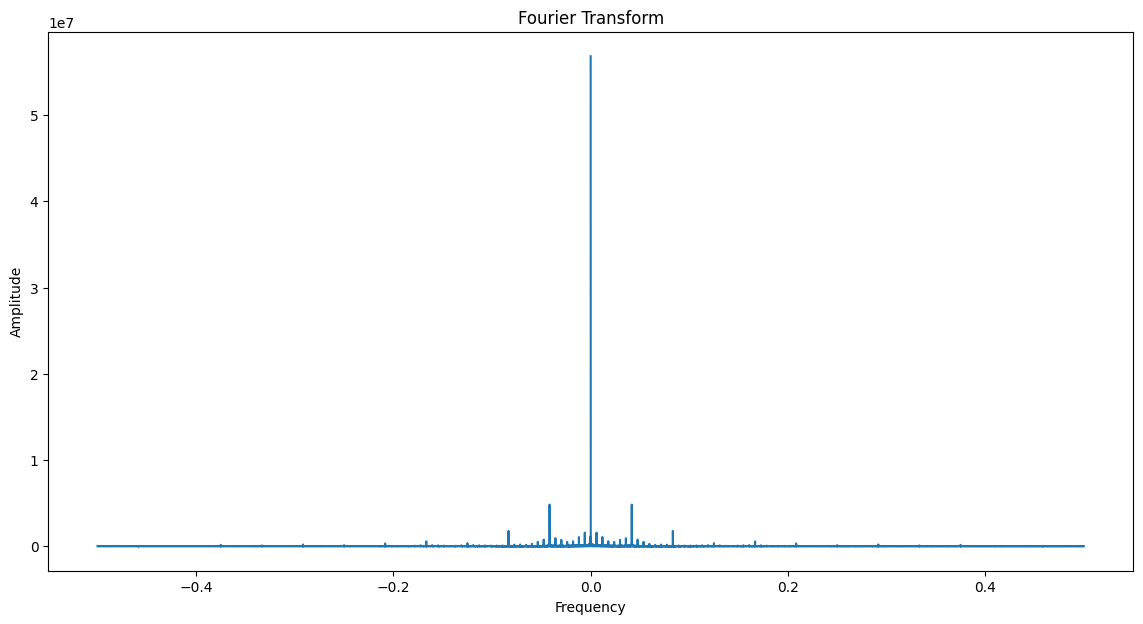

In [20]:
import numpy as np

# Perform Fourier Transform
fft = np.fft.fft(df['nat_demand'].dropna())
fft_freq = np.fft.fftfreq(len(fft))

# Plot the Fourier Transform
plt.figure(figsize=(14, 7))
plt.plot(fft_freq, np.abs(fft))
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 06, Aug, 2024
Time:                     16:06:35
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -19.4109
Nobs:                     48047.0    HQIC:                  -19.4147
Log likelihood:           125602.    FPE:                3.69450e-09
AIC:                     -19.4164    Det(Omega_mle):     3.69220e-09
--------------------------------------------------------------------
Results for equation nat_demand
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                32.752087         6.212305            5.272           0.000
L1.nat_demand         0.940989         0.001859          506.258           0.000
L1.T2M_toc            1.268392         0.212893        

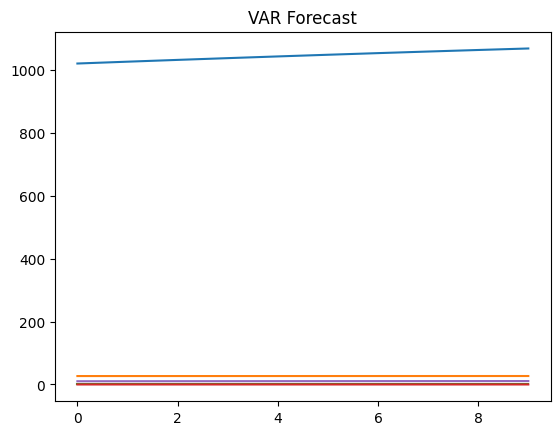

In [22]:
from statsmodels.tsa.api import VAR

# Prepare the data for VAR model
df_var = df[['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc']].dropna()

# Fit the VAR model
var_model = VAR(df_var)
var_fit = var_model.fit()

# Print summary of the model
print(var_fit.summary())

# Plot the forecast
var_forecast = var_fit.forecast(df_var.values[-var_fit.k_ar:], steps=10)
plt.plot(var_forecast)
plt.title('VAR Forecast')
plt.show()

Mean Squared Error: 10747.539837035452


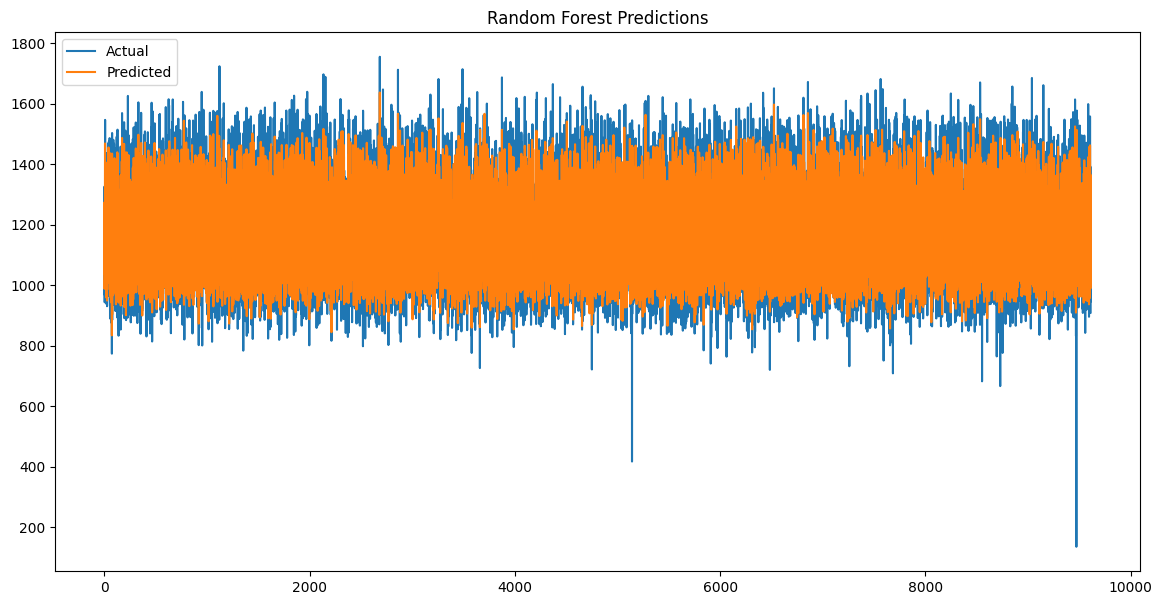

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df.drop(columns=['nat_demand']).dropna()
y = df['nat_demand'].dropna()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()